# Setting up and importing libraries

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import scipy
import scipy.stats as stats
import shap
from sklearn.model_selection import KFold


In [176]:
train_data = pd.read_csv('/content/drive/MyDrive/Data Science/Kaggle Competitions/Regression/Podcast Listening Time/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Data Science/Kaggle Competitions/Regression/Podcast Listening Time/test.csv')
train_data

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [177]:
original = pd.read_csv('/content/drive/MyDrive/Data Science/Kaggle Competitions/Regression/Podcast Listening Time/podcast_dataset.csv')
original

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Healthy Living,Episode 77,99.25,Health,21.37,Thursday,Night,70.22,3,Positive,55.158695
1,Mystery Matters,Episode 6,19.43,True Crime,47.19,Friday,Evening,75.15,1,Neutral,7.686559
2,Current Affairs,Episode 1,117.03,News,96.33,Sunday,Night,57.95,3,Neutral,110.064645
3,Mystery Matters,Episode 38,16.97,True Crime,25.73,Monday,Night,24.19,0,Positive,12.000380
4,Humor Hub,Episode 73,83.48,Comedy,76.69,Tuesday,Afternoon,42.31,3,Positive,NaN
...,...,...,...,...,...,...,...,...,...,...,...
52495,Home & Living,Episode 17,24.81,Lifestyle,66.15,Monday,Evening,98.63,1,Neutral,20.573795
52496,Melody Mix,Episode 9,92.15,Music,89.61,Saturday,Night,25.82,2,Negative,76.198459
52497,Comedy Corner,Episode 24,112.27,Comedy,26.33,Saturday,Night,55.29,0,Neutral,107.602135
52498,Business Briefs,Episode 85,NaN,Business,41.47,Wednesday,Afternoon,33.58,0,Neutral,17.220998


In [178]:
original.isna().sum()

,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,5246
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,5258
Number_of_Ads,0
Episode_Sentiment,0


In [179]:
# original['Episode_Length_minutes'].fillna(original['Episode_Length_minutes'].median(), inplace=True)
# original['Guest_Popularity_percentage'].fillna(original['Guest_Popularity_percentage'].median(), inplace=True)
original.dropna(inplace = True)
original

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Healthy Living,Episode 77,99.25,Health,21.37,Thursday,Night,70.22,3,Positive,55.158695
1,Mystery Matters,Episode 6,19.43,True Crime,47.19,Friday,Evening,75.15,1,Neutral,7.686559
2,Current Affairs,Episode 1,117.03,News,96.33,Sunday,Night,57.95,3,Neutral,110.064645
3,Mystery Matters,Episode 38,16.97,True Crime,25.73,Monday,Night,24.19,0,Positive,12.000380
6,Style Guide,Episode 76,63.77,Lifestyle,58.84,Saturday,Afternoon,82.20,0,Positive,57.827346
...,...,...,...,...,...,...,...,...,...,...,...
52494,Market Masters,Episode 23,33.35,Business,63.23,Monday,Morning,90.81,1,Positive,32.133509
52495,Home & Living,Episode 17,24.81,Lifestyle,66.15,Monday,Evening,98.63,1,Neutral,20.573795
52496,Melody Mix,Episode 9,92.15,Music,89.61,Saturday,Night,25.82,2,Negative,76.198459
52497,Comedy Corner,Episode 24,112.27,Comedy,26.33,Saturday,Night,55.29,0,Neutral,107.602135


In [180]:
train_data = pd.concat([train_data, original], ignore_index=True)
train_data

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0.0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.419980
1,1.0,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.012410
2,2.0,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.925310
3,3.0,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.278240
4,4.0,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.610310
...,...,...,...,...,...,...,...,...,...,...,...,...
788158,NaN,Market Masters,Episode 23,33.35,Business,63.23,Monday,Morning,90.81,1.0,Positive,32.133509
788159,NaN,Home & Living,Episode 17,24.81,Lifestyle,66.15,Monday,Evening,98.63,1.0,Neutral,20.573795
788160,NaN,Melody Mix,Episode 9,92.15,Music,89.61,Saturday,Night,25.82,2.0,Negative,76.198459
788161,NaN,Comedy Corner,Episode 24,112.27,Comedy,26.33,Saturday,Night,55.29,0.0,Neutral,107.602135


In [181]:
train_data = train_data.drop(['id'], axis=1)


#Data Preprocessing

##Check for missing data

In [182]:
train_data.isna().sum()

,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,87093
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,146030
Number_of_Ads,1
Episode_Sentiment,0


In [183]:
test_data.isna().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,28736
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,48832
Number_of_Ads,0


###Fill missing data with Null(omitted) instead filling with median

In [184]:
# train_data.fillna('Null', inplace=True)
# test_data.fillna('Null',inplace=True)
# train_data

##Check For Duplicates

In [185]:
train_data.duplicated().sum()

np.int64(1822)

In [186]:
train_data.drop_duplicates(inplace=True)
train_data

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.419980
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.012410
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.925310
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.278240
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.610310
...,...,...,...,...,...,...,...,...,...,...,...
786336,Finance Focus,Episode 77,92.44,Business,27.34,Thursday,Morning,63.54,3.0,Positive,43.731430
786337,Wellness Wave,Episode 100,50.30,Health,20.61,Thursday,Morning,55.63,0.0,Positive,33.983723
786338,Brain Boost,Episode 12,89.78,Education,93.08,Saturday,Evening,93.12,3.0,Positive,56.795223
786339,Tech Trends,Episode 18,77.86,Technology,41.04,Saturday,Afternoon,52.33,2.0,Positive,46.797187


##Going through each feature and do one last sweep(checking for hidden duplicates, potentially replacing null with something better, etc)

###Categorical features

In [187]:
print(train_data['Podcast_Name'].unique())

['Mystery Matters' 'Joke Junction' 'Study Sessions' 'Digital Digest'
 'Mind & Body' 'Fitness First' 'Criminal Minds' 'News Roundup'
 'Daily Digest' 'Music Matters' 'Sports Central' 'Melody Mix' 'Game Day'
 'Gadget Geek' 'Global News' 'Tech Talks' 'Sport Spot' 'Funny Folks'
 'Sports Weekly' 'Business Briefs' 'Tech Trends' 'Innovators'
 'Health Hour' 'Comedy Corner' 'Sound Waves' 'Brain Boost'
 "Athlete's Arena" 'Wellness Wave' 'Style Guide' 'World Watch' 'Humor Hub'
 'Money Matters' 'Healthy Living' 'Home & Living' 'Educational Nuggets'
 'Market Masters' 'Learning Lab' 'Lifestyle Lounge' 'Crime Chronicles'
 'Detective Diaries' 'Life Lessons' 'Current Affairs' 'Finance Focus'
 'Laugh Line' 'True Crime Stories' 'Business Insights' 'Fashion Forward'
 'Tune Time']


In [188]:
print(train_data['Episode_Title'].unique())

['Episode 98' 'Episode 26' 'Episode 16' 'Episode 45' 'Episode 86'
 'Episode 19' 'Episode 47' 'Episode 44' 'Episode 32' 'Episode 81'
 'Episode 66' 'Episode 62' 'Episode 76' 'Episode 37' 'Episode 20'
 'Episode 82' 'Episode 72' 'Episode 61' 'Episode 100' 'Episode 54'
 'Episode 17' 'Episode 36' 'Episode 97' 'Episode 27' 'Episode 31'
 'Episode 88' 'Episode 38' 'Episode 92' 'Episode 74' 'Episode 30'
 'Episode 63' 'Episode 67' 'Episode 77' 'Episode 4' 'Episode 93'
 'Episode 24' 'Episode 1' 'Episode 2' 'Episode 25' 'Episode 56'
 'Episode 75' 'Episode 12' 'Episode 21' 'Episode 6' 'Episode 85'
 'Episode 23' 'Episode 33' 'Episode 7' 'Episode 53' 'Episode 15'
 'Episode 43' 'Episode 71' 'Episode 69' 'Episode 13' 'Episode 89'
 'Episode 3' 'Episode 64' 'Episode 73' 'Episode 79' 'Episode 94'
 'Episode 80' 'Episode 42' 'Episode 10' 'Episode 48' 'Episode 96'
 'Episode 40' 'Episode 49' 'Episode 9' 'Episode 50' 'Episode 78'
 'Episode 84' 'Episode 87' 'Episode 58' 'Episode 57' 'Episode 59'
 'Episode 39' 'E

In [189]:
print(train_data['Genre'].unique())

['True Crime' 'Comedy' 'Education' 'Technology' 'Health' 'News' 'Music'
 'Sports' 'Business' 'Lifestyle']


In [190]:
print(train_data['Publication_Time'].unique())

['Night' 'Afternoon' 'Evening' 'Morning']


In [191]:
print(train_data['Publication_Day'].unique())

['Thursday' 'Saturday' 'Tuesday' 'Monday' 'Sunday' 'Wednesday' 'Friday']


In [192]:
print(train_data['Episode_Sentiment'].unique())

['Positive' 'Negative' 'Neutral']


###Numerical Data

In [193]:
print(train_data['Number_of_Ads'].unique())

[  0.     2.     3.     1.    53.37    nan 103.91 103.    53.42 103.75
  12.   103.25 103.88]


In [194]:
train_data['Number_of_Ads'] = train_data['Number_of_Ads'].fillna(0.0)
test_data['Number_of_Ads'] = test_data['Number_of_Ads'].fillna(0.0)


In [195]:
train_data[(train_data["Podcast_Name"] == "Mystery Matters") & (train_data["Episode_Title"] == "Episode 1") & (train_data["Publication_Day"] == "Sunday")].sort_values('Episode_Title', ascending=False)


,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
2221,Mystery Matters,Episode 1,55.10,True Crime,68.79,Sunday,Afternoon,6.29,1.0,Positive,35.762540
26451,Mystery Matters,Episode 1,NaN,True Crime,95.01,Sunday,Morning,22.62,0.0,Neutral,89.246080
55281,Mystery Matters,Episode 1,NaN,True Crime,26.32,Sunday,Evening,NaN,0.0,Positive,21.610000
338651,Mystery Matters,Episode 1,17.67,True Crime,97.07,Sunday,Afternoon,76.16,1.0,Neutral,15.692490
394230,Mystery Matters,Episode 1,62.65,True Crime,54.62,Sunday,Night,5.21,0.0,Positive,49.659340
497233,Mystery Matters,Episode 1,NaN,True Crime,87.53,Sunday,Evening,NaN,0.0,Neutral,28.930490
509221,Mystery Matters,Episode 1,12.35,True Crime,72.56,Sunday,Night,NaN,0.0,Positive,12.355790
529792,Mystery Matters,Episode 1,29.10,True Crime,60.38,Sunday,Night,99.83,3.0,Negative,15.953270
531637,Mystery Matters,Episode 1,38.67,True Crime,87.02,Sunday,Evening,90.55,3.0,Negative,28.065360
531651,Mystery Matters,Episode 1,68.99,True Crime,31.76,Sunday,Night,77.92,1.0,Positive,66.606540


In [196]:
train_data['Episode_Length_minutes'].fillna(train_data['Episode_Length_minutes'].mean(), inplace=True)
train_data['Guest_Popularity_percentage'].fillna(train_data['Guest_Popularity_percentage'].mean(), inplace=True)
test_data['Episode_Length_minutes'].fillna(test_data['Episode_Length_minutes'].mean(), inplace=True)
test_data['Guest_Popularity_percentage'].fillna(test_data['Guest_Popularity_percentage'].mean(), inplace=True)


In [197]:
train_data.isna().sum()

,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,0
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,0
Number_of_Ads,0
Episode_Sentiment,0


##Check type

In [198]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 786341 entries, 0 to 786340
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 786341 non-null  object 
 1   Episode_Title                786341 non-null  object 
 2   Episode_Length_minutes       786341 non-null  float64
 3   Genre                        786341 non-null  object 
 4   Host_Popularity_percentage   786341 non-null  float64
 5   Publication_Day              786341 non-null  object 
 6   Publication_Time             786341 non-null  object 
 7   Guest_Popularity_percentage  786341 non-null  float64
 8   Number_of_Ads                786341 non-null  float64
 9   Episode_Sentiment            786341 non-null  object 
 10  Listening_Time_minutes       786341 non-null  float64
dtypes: float64(5), object(6)
memory usage: 72.0+ MB


#EDA

In [199]:
numerical_feat = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']
categorical_feat = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

In [200]:
Y = train_data['Listening_Time_minutes']
X = train_data.drop(['Listening_Time_minutes'], axis=1)
test_data = test_data.drop(['id'], axis=1)


In [201]:
X

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,Mystery Matters,Episode 98,64.420783,True Crime,74.81,Thursday,Night,52.114599,0.0,Positive
1,Joke Junction,Episode 26,119.800000,Comedy,66.95,Saturday,Afternoon,75.950000,2.0,Negative
2,Study Sessions,Episode 16,73.900000,Education,69.97,Tuesday,Evening,8.970000,0.0,Negative
3,Digital Digest,Episode 45,67.170000,Technology,57.22,Monday,Morning,78.700000,2.0,Positive
4,Mind & Body,Episode 86,110.510000,Health,80.07,Monday,Afternoon,58.680000,3.0,Neutral
...,...,...,...,...,...,...,...,...,...,...
786336,Finance Focus,Episode 77,92.440000,Business,27.34,Thursday,Morning,63.540000,3.0,Positive
786337,Wellness Wave,Episode 100,50.300000,Health,20.61,Thursday,Morning,55.630000,0.0,Positive
786338,Brain Boost,Episode 12,89.780000,Education,93.08,Saturday,Evening,93.120000,3.0,Positive
786339,Tech Trends,Episode 18,77.860000,Technology,41.04,Saturday,Afternoon,52.330000,2.0,Positive


##Distribution for Numerical and Proportion for Categorical

Text(0.5, 0.98, 'Visualizing Continuous Columns')

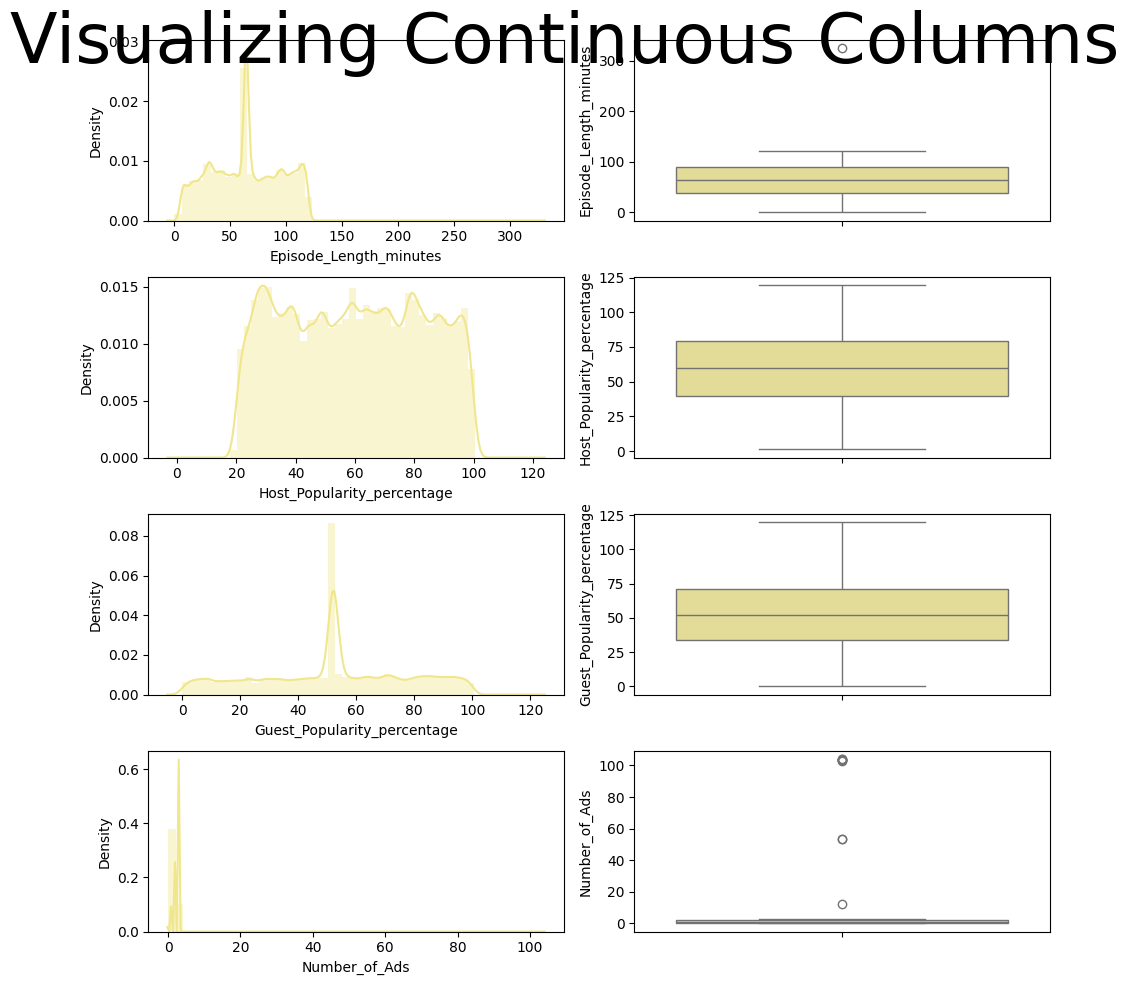

In [202]:
fig,ax = plt.subplots(4,2,figsize=(10,10))
for index, i in enumerate(numerical_feat):
    sns.distplot(X[i],ax=ax[index,0],color = 'khaki')
    sns.boxplot(X[i],ax=ax[index,1],color = 'khaki')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=50)

Text(0.5, 0.98, 'Visualizing Continuous Columns')

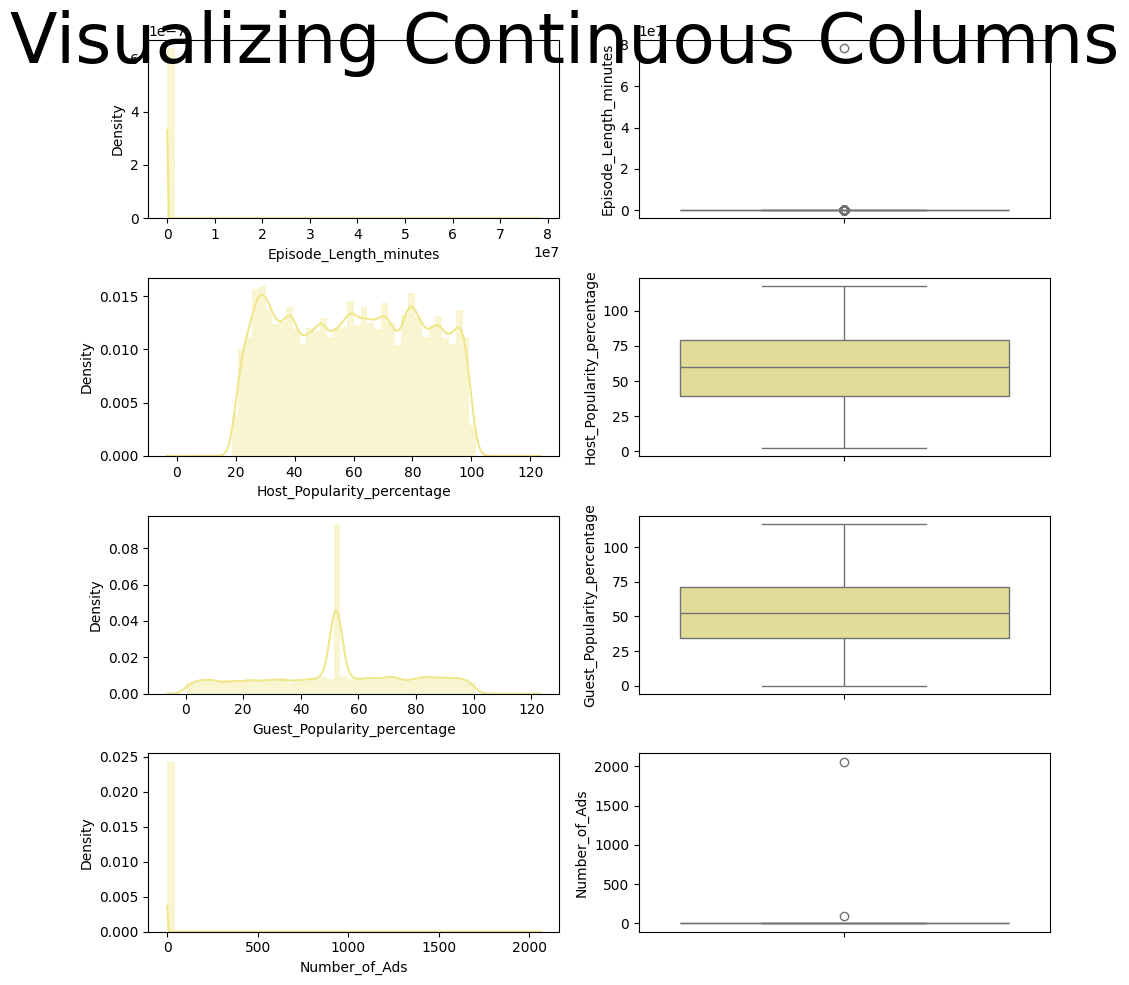

In [203]:
fig,ax = plt.subplots(4,2,figsize=(10,10))
for index, i in enumerate(numerical_feat):
    sns.distplot(test_data[i],ax=ax[index,0],color = 'khaki')
    sns.boxplot(test_data[i],ax=ax[index,1],color = 'khaki')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=50)

##Remove outliers (omitted) because test data also contains outliers

In [204]:
# from scipy.special import y0
# z = np.abs(stats.zscore(X[numerical_feat]))

# #only keep rows in dataframe with all z-scores less than absolute value of 3
# X = X[(z<3).all(axis=1)]
# Y = Y[(z<3).all(axis=1)]
# X.shape

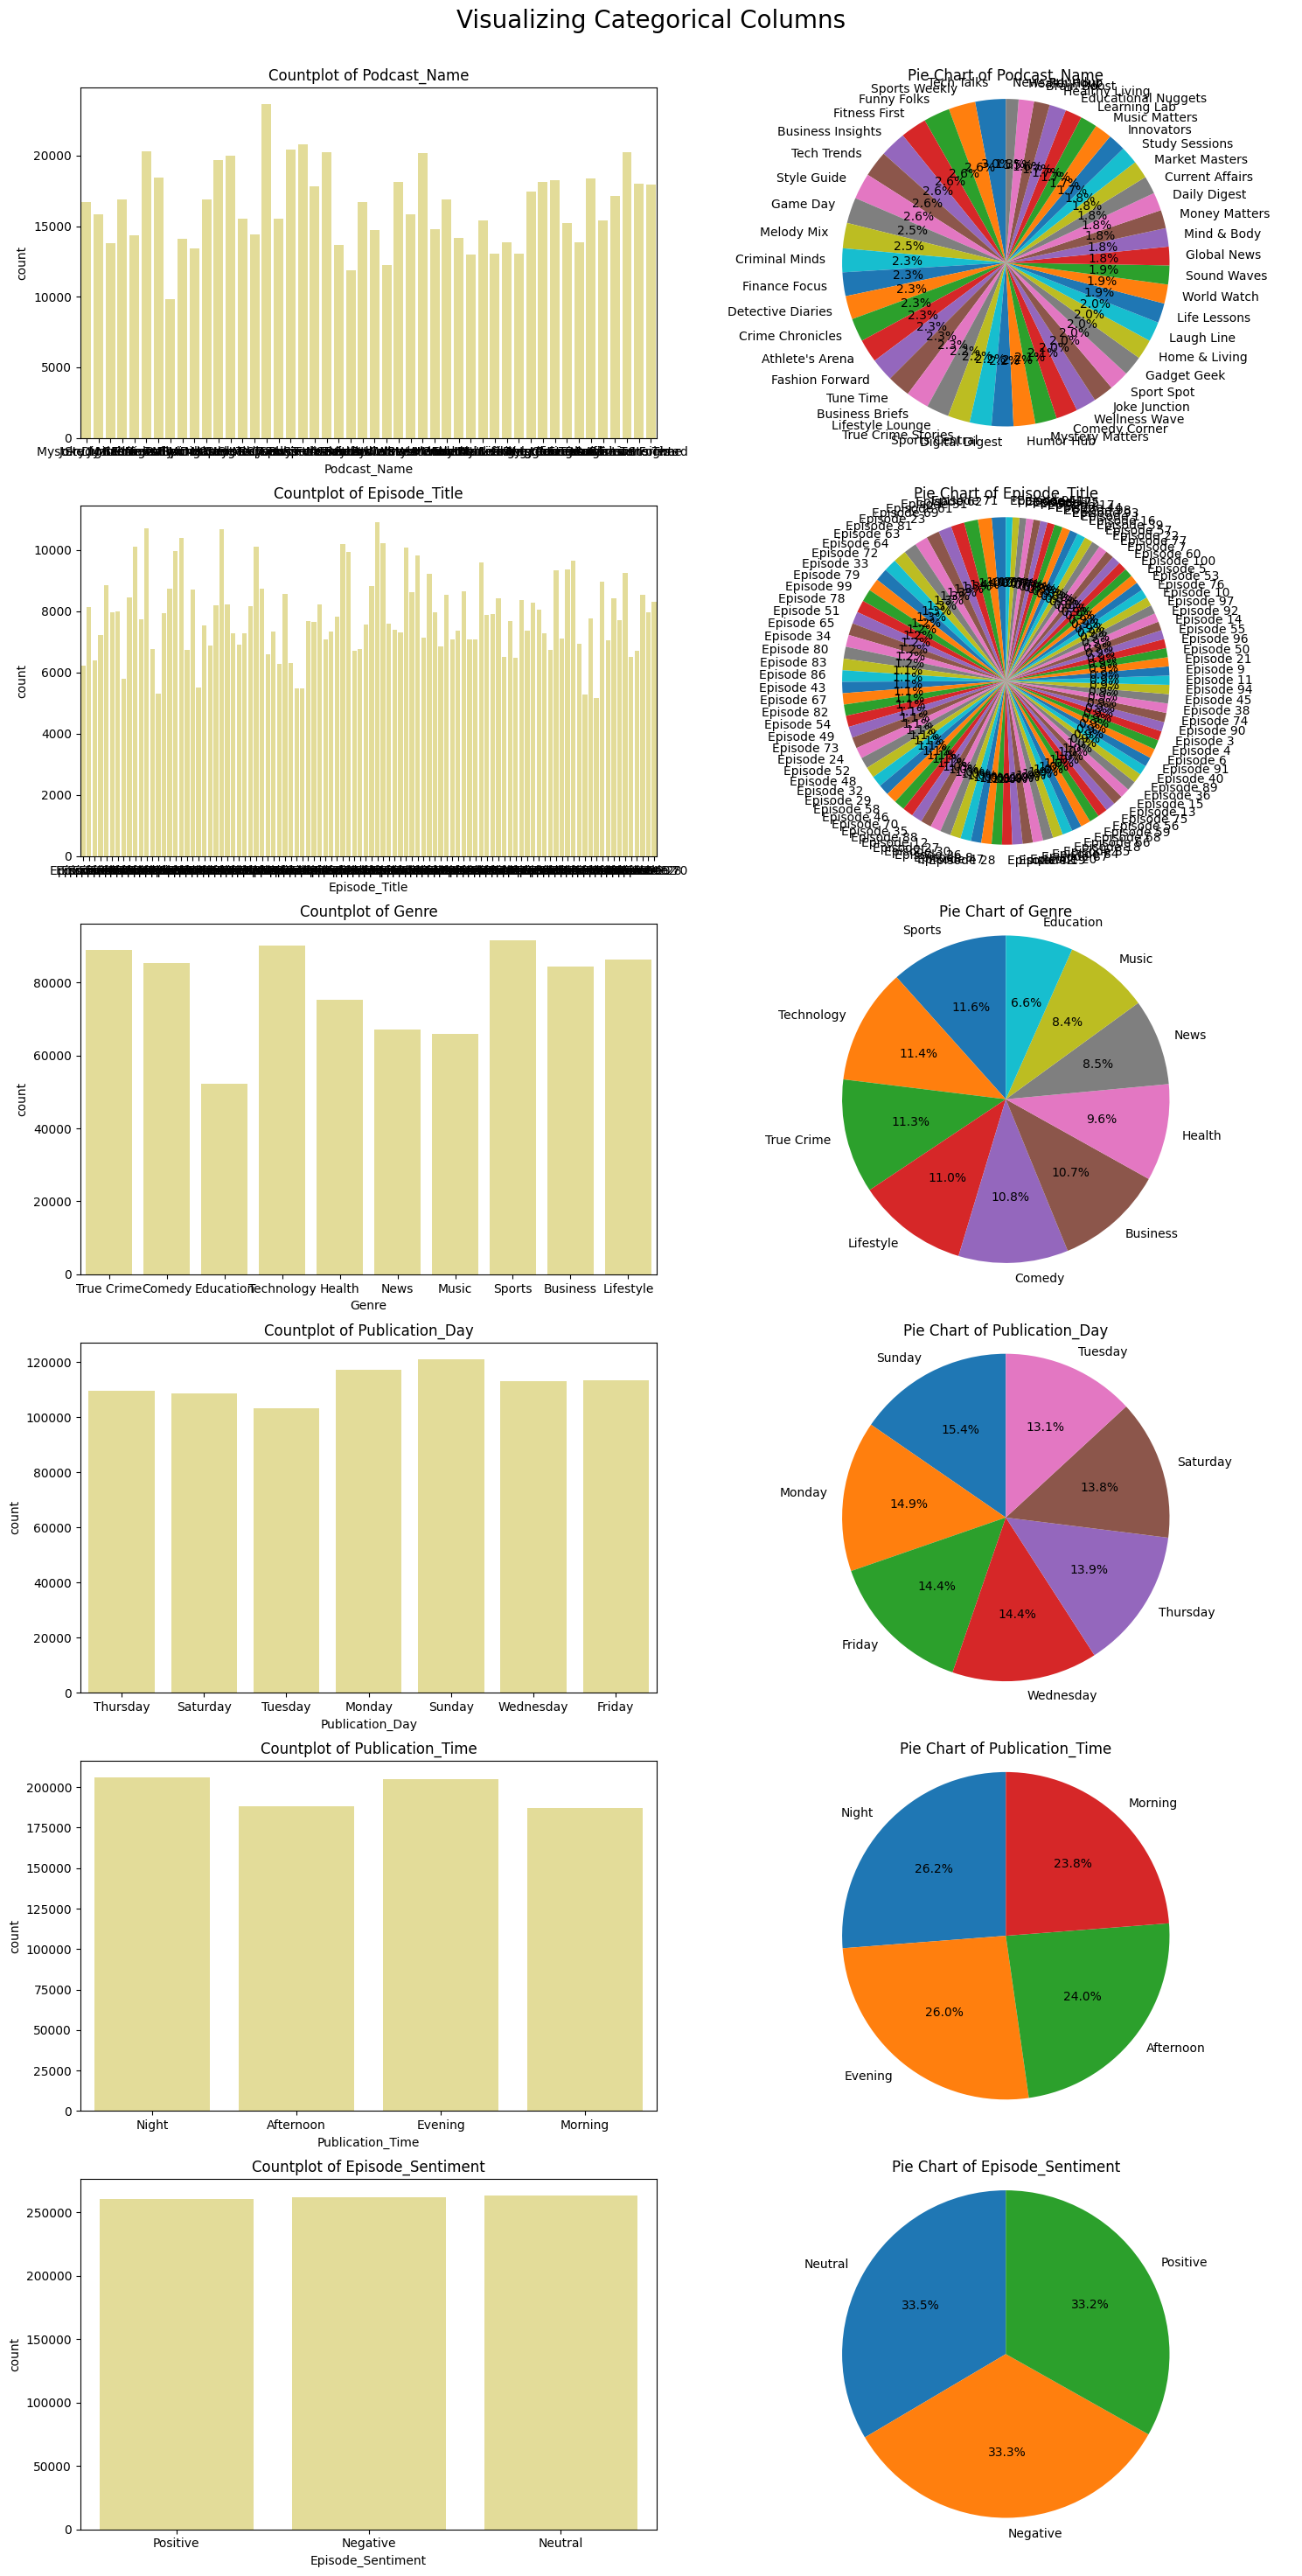

In [205]:
fig, ax = plt.subplots(len(categorical_feat), 2, figsize=(15, len(categorical_feat) * 5))

for index, feature in enumerate(categorical_feat):
    sns.countplot(data=X, x=feature, ax=ax[index, 0], color='khaki')
    ax[index, 0].set_title(f"Countplot of {feature}")

    value_counts = X[feature].value_counts()
    labels = value_counts.index.tolist()
    sizes = value_counts.values

    ax[index, 1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[index, 1].axis('equal')
    ax[index, 1].set_title(f"Pie Chart of {feature}")

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.suptitle("Visualizing Categorical Columns", fontsize=20)

plt.show()

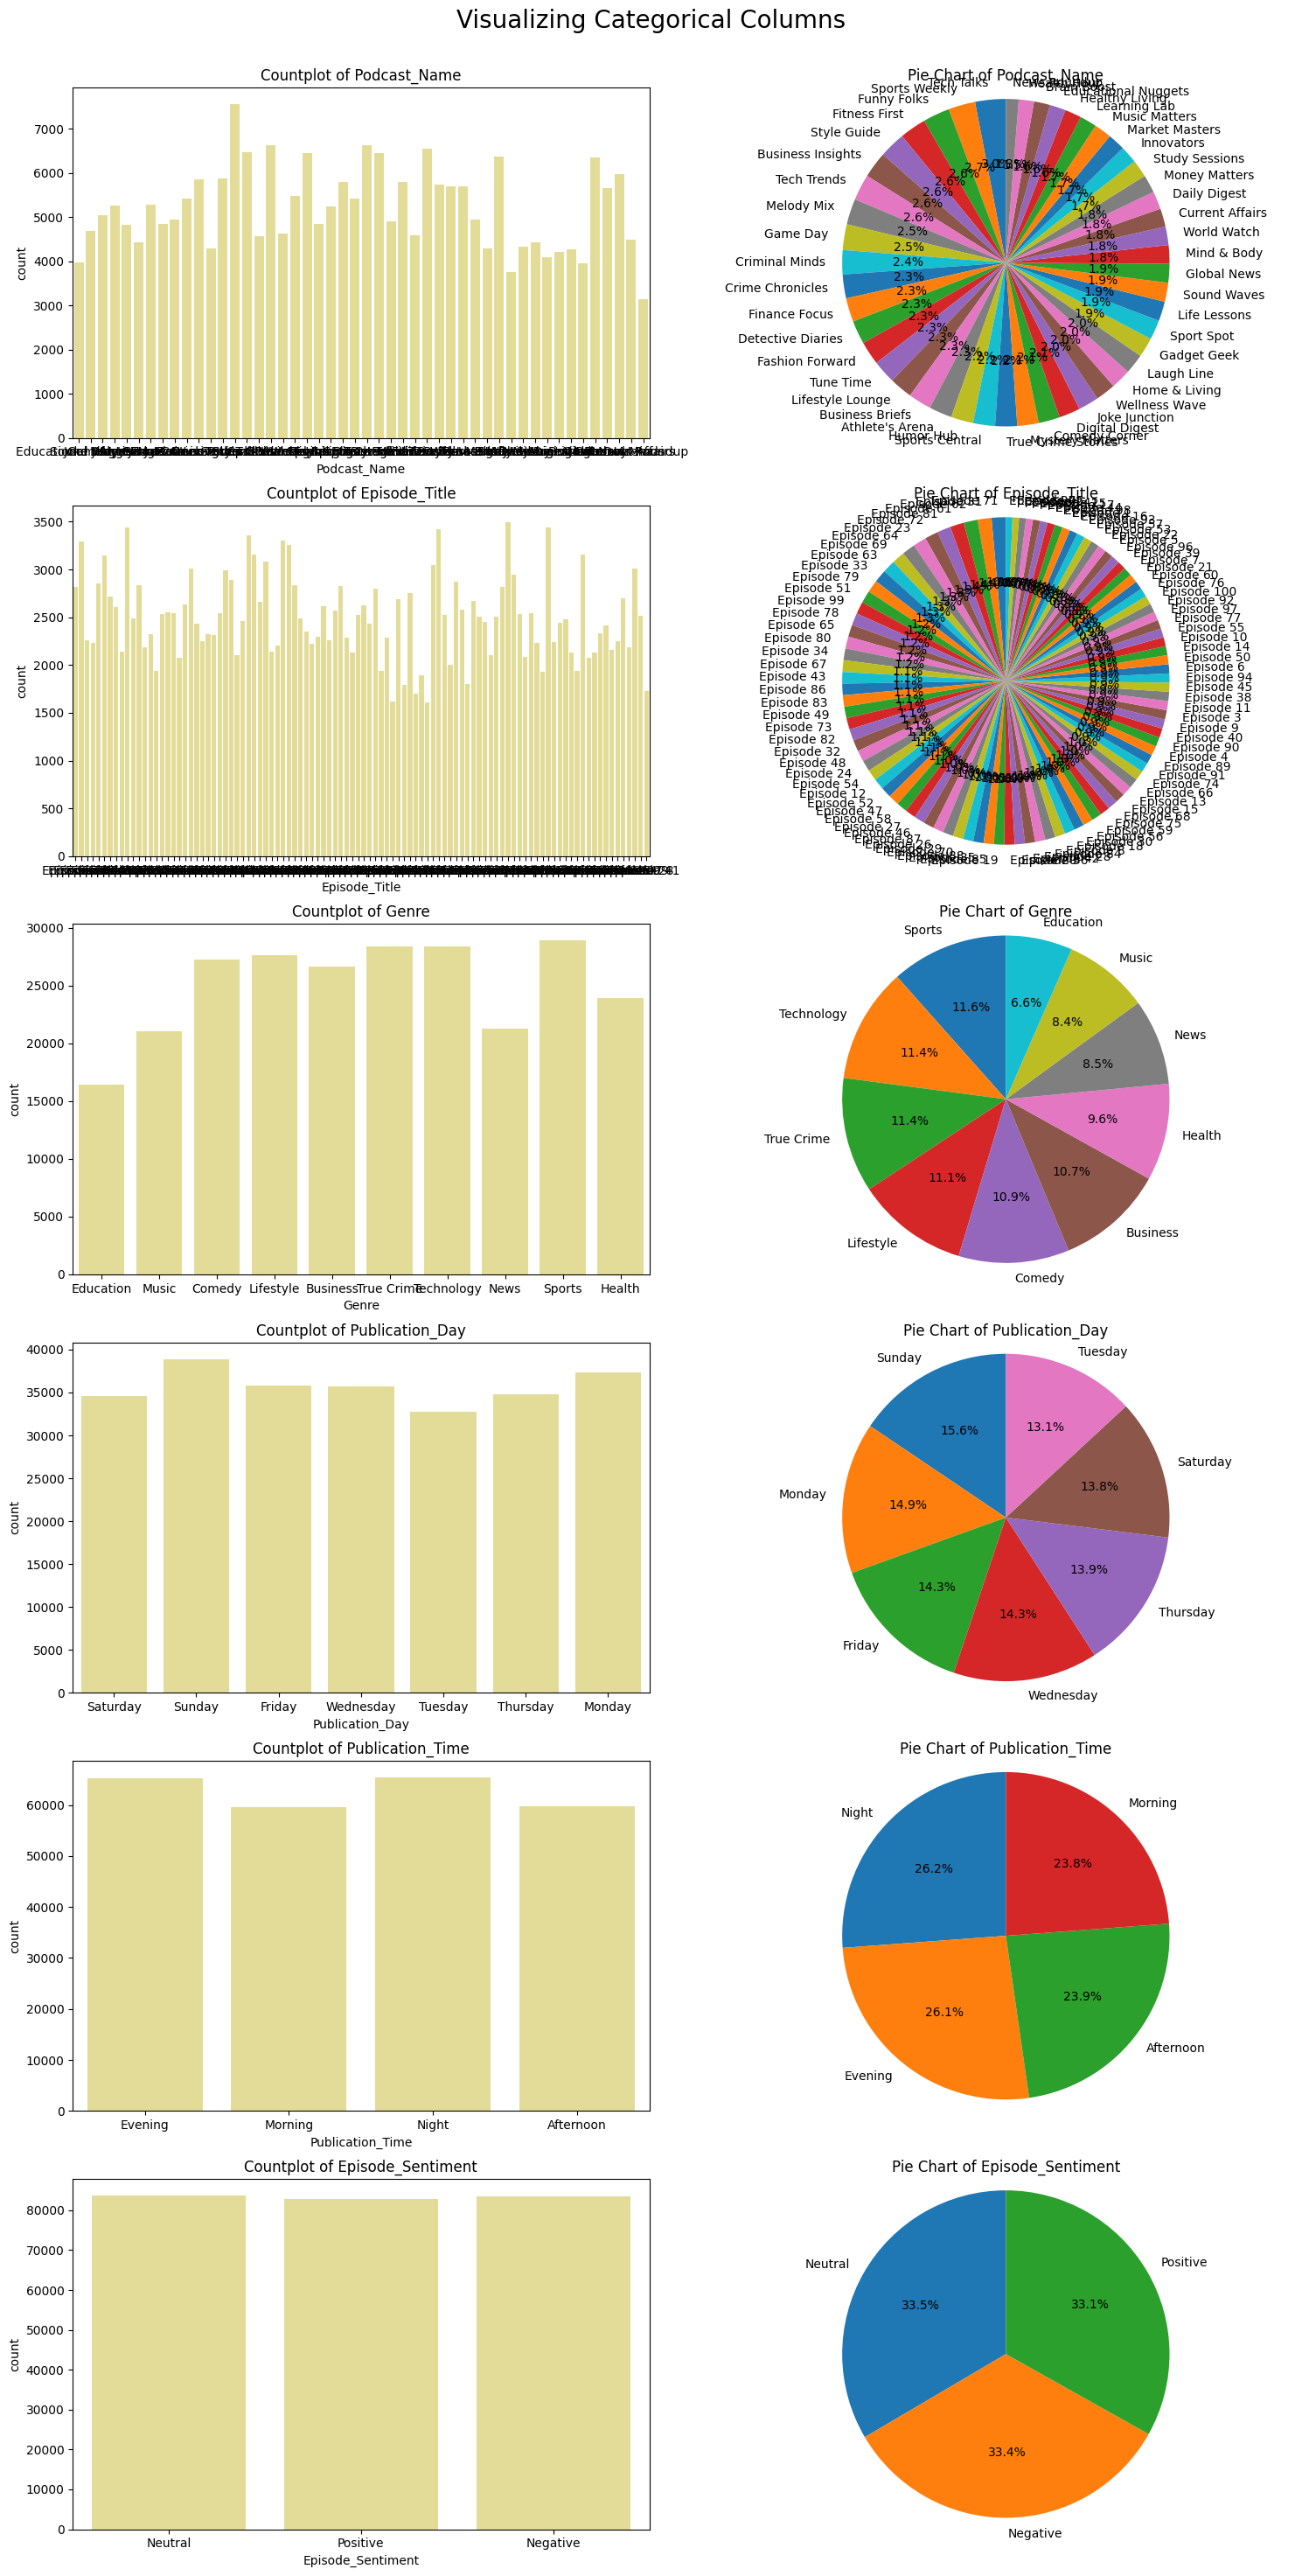

In [206]:
fig, ax = plt.subplots(len(categorical_feat), 2, figsize=(15, len(categorical_feat) * 5))

for index, feature in enumerate(categorical_feat):
    sns.countplot(data=test_data, x=feature, ax=ax[index, 0], color='khaki')
    ax[index, 0].set_title(f"Countplot of {feature}")

    value_counts = test_data[feature].value_counts()
    labels = value_counts.index.tolist()
    sizes = value_counts.values

    ax[index, 1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[index, 1].axis('equal')
    ax[index, 1].set_title(f"Pie Chart of {feature}")

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.suptitle("Visualizing Categorical Columns", fontsize=20)

plt.show()

##Heatmap

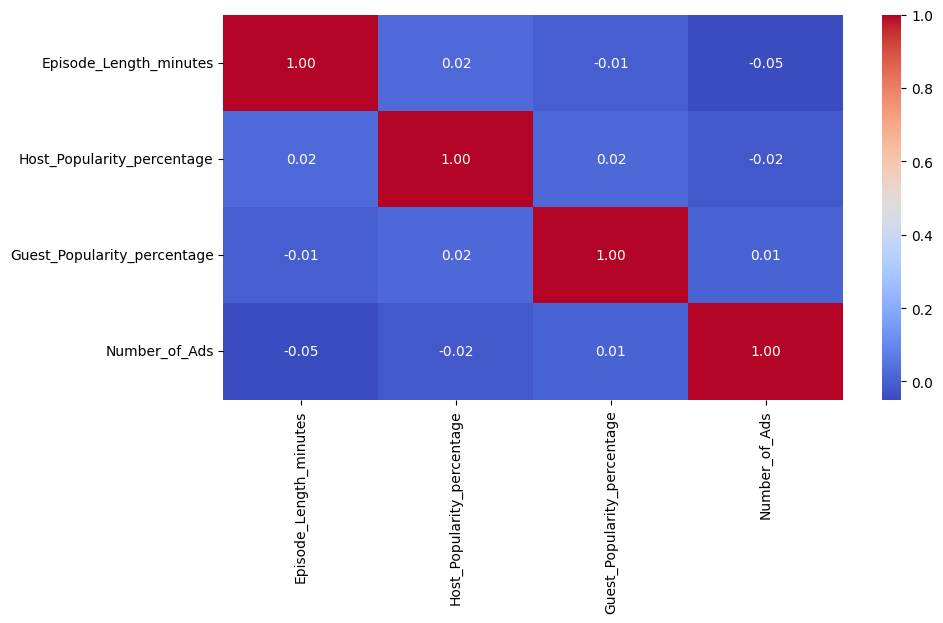

In [207]:
plt.figure(figsize=(10,5))
sns.heatmap(X[numerical_feat].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

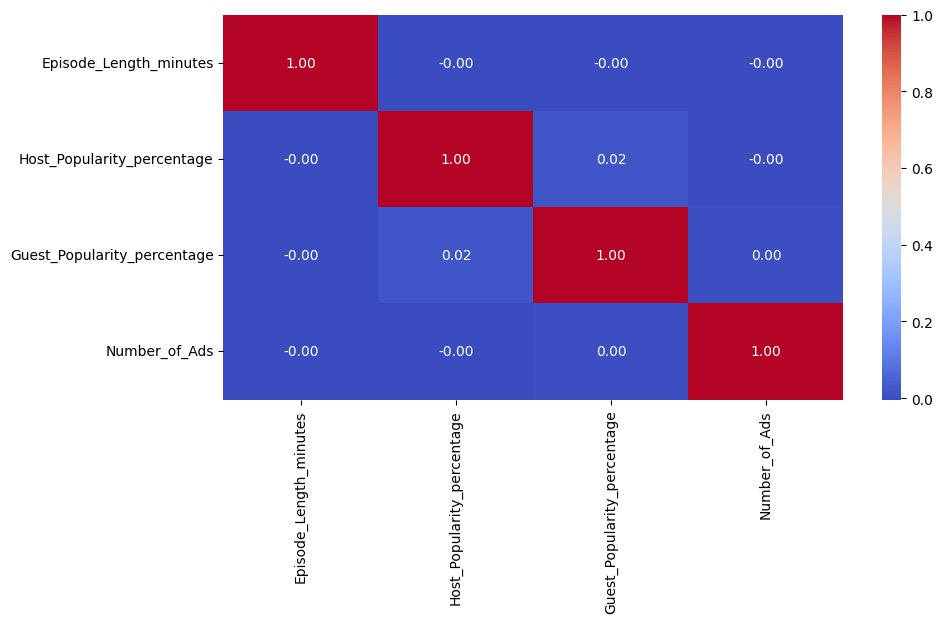

In [208]:
plt.figure(figsize=(10,5))
sns.heatmap(test_data[numerical_feat].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

###Feature Engineering

In [209]:
X['Ads_per_min'] = X.apply(lambda row: 0 if row['Number_of_Ads'] == 0 else row['Episode_Length_minutes'] / row['Number_of_Ads'], axis=1)
# X['Host_or_Guest'] = np.where(X['Host_Popularity_percentage'] > X['Guest_Popularity_percentage'],
                              #  X['Host_Popularity_percentage'],
                              #  X['Guest_Popularity_percentage'])
test_data['Ads_per_min'] = test_data.apply(lambda row: 0 if row['Number_of_Ads'] == 0 else row['Episode_Length_minutes'] / row['Number_of_Ads'], axis=1)
# test_data['Host_or_Guest'] = np.where(test_data['Host_Popularity_percentage'] > test_data['Guest_Popularity_percentage'],
                              #  test_data['Host_Popularity_percentage'],
                              #  test_data['Guest_Popularity_percentage'])
# categorical_feat.append('Host_or_Guest')
X

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Ads_per_min
0,Mystery Matters,Episode 98,64.420783,True Crime,74.81,Thursday,Night,52.114599,0.0,Positive,0.000000
1,Joke Junction,Episode 26,119.800000,Comedy,66.95,Saturday,Afternoon,75.950000,2.0,Negative,59.900000
2,Study Sessions,Episode 16,73.900000,Education,69.97,Tuesday,Evening,8.970000,0.0,Negative,0.000000
3,Digital Digest,Episode 45,67.170000,Technology,57.22,Monday,Morning,78.700000,2.0,Positive,33.585000
4,Mind & Body,Episode 86,110.510000,Health,80.07,Monday,Afternoon,58.680000,3.0,Neutral,36.836667
...,...,...,...,...,...,...,...,...,...,...,...
786336,Finance Focus,Episode 77,92.440000,Business,27.34,Thursday,Morning,63.540000,3.0,Positive,30.813333
786337,Wellness Wave,Episode 100,50.300000,Health,20.61,Thursday,Morning,55.630000,0.0,Positive,0.000000
786338,Brain Boost,Episode 12,89.780000,Education,93.08,Saturday,Evening,93.120000,3.0,Positive,29.926667
786339,Tech Trends,Episode 18,77.860000,Technology,41.04,Saturday,Afternoon,52.330000,2.0,Positive,38.930000


##Mutual Information

###Label Encoder

In [210]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in categorical_feat:
  X[i] = label_encoder.fit_transform(X[i])
  test_data[i] = label_encoder.fit_transform(test_data[i])
X[categorical_feat]

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
0,34,98,9,4,3,2
1,24,19,1,2,0,0
2,40,8,2,5,1,0
3,10,40,8,1,2,2
4,31,85,3,1,0,1
...,...,...,...,...,...,...
786336,13,75,0,4,2,2
786337,46,2,3,4,2,2
786338,1,4,2,2,1,2
786339,43,10,8,2,0,2


In [211]:
X.isna().sum()

,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,0
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,0
Number_of_Ads,0
Episode_Sentiment,0


In [212]:
from sklearn.feature_selection import mutual_info_regression

y_sampled = Y
mutual_df = X

mutual_info = mutual_info_regression(mutual_df, y_sampled, random_state=42)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] )
mutual_info.style.background_gradient("cool")

,Numerical_Feature_MI
Episode_Length_minutes,2.091206
Ads_per_min,1.155510
Host_Popularity_percentage,0.825730
Episode_Title,0.704878
Guest_Popularity_percentage,0.692779
Podcast_Name,0.434123
Publication_Day,0.244084
Number_of_Ads,0.236422
Genre,0.203465
Publication_Time,0.175601


##Distribution of Labels

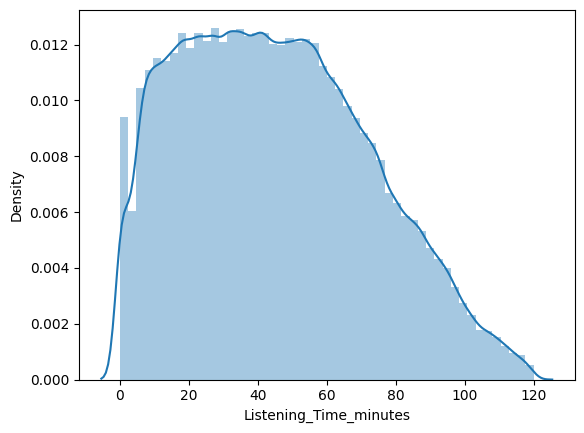

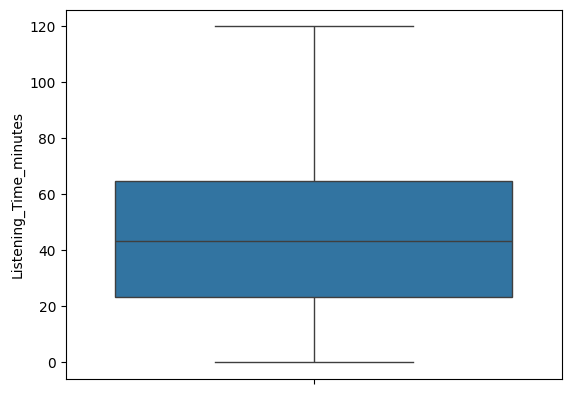

In [213]:
sns.distplot(Y)
# Show the plot
plt.show()
sns.boxplot(Y)
# Show the plot
plt.show()

#Modeling

##Finding a baseline model

In [214]:
pip install catboost


In [215]:
# used_feat = ["Episode_Length_minutes", "Host_Popularity_percentage","Episode_Title","Guest_Popularity_percentage","Podcast_Name"]
# X = X[used_feat]

In [216]:
from sklearn.linear_model import LinearRegression , ElasticNet , Lasso , Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict

In [217]:
lgbm = LGBMRegressor()
# random = RandomForestRegressor()
linear = LinearRegression()
ridge = Ridge()
# svr=SVR()
# gbr = GradientBoostingRegressor()
bay = BayesianRidge()
lr = LogisticRegression()
xgb1 = XGBRegressor()
# cb = CatBoostRegressor()


In [218]:
from statistics import mean, stdev
cv = KFold(n_splits= 5, shuffle=True, random_state=42)

def compute(model):
    lst_accu_stratified = []
    lst_rmse_stratified = []
    fold = 1
    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, Y_train)
        preds = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(Y_test, preds))
        r2 = r2_score(Y_test, preds)
        print(f"Fold {fold}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

        print("\n" + "=" * 75 + "\n")
        lst_accu_stratified.append(r2)
        lst_rmse_stratified.append(rmse)
        fold +=1

    mean_rmse = mean(lst_rmse_stratified)
    max_rmse = max(lst_rmse_stratified)
    min_rmse = min(lst_rmse_stratified)
    max_val_score = max(lst_accu_stratified)
    min_val_score = min(lst_accu_stratified)
    mean_val_score = mean(lst_accu_stratified)
    std = stdev(lst_accu_stratified)

    hashmap[str(model)]=([mean_rmse, max_rmse, min_rmse, mean_val_score, max_val_score, min_val_score, std])

In [219]:
clf = [linear, ridge, xgb1, bay, lgbm, xgb1]
hashmap={}
for i in clf:
    compute(i)

Fold 1: RMSE = 13.2646, R2 = 0.7610


Fold 2: RMSE = 13.2905, R2 = 0.7596


Fold 3: RMSE = 13.3007, R2 = 0.7592


Fold 4: RMSE = 13.3303, R2 = 0.7605


Fold 5: RMSE = 13.3105, R2 = 0.7589


Fold 1: RMSE = 13.2646, R2 = 0.7610


Fold 2: RMSE = 13.2905, R2 = 0.7596


Fold 3: RMSE = 13.3007, R2 = 0.7592


Fold 4: RMSE = 13.3303, R2 = 0.7605


Fold 5: RMSE = 13.3105, R2 = 0.7589


Fold 1: RMSE = 12.9214, R2 = 0.7732


Fold 2: RMSE = 12.9416, R2 = 0.7721


Fold 3: RMSE = 12.9545, R2 = 0.7716


Fold 4: RMSE = 12.9832, R2 = 0.7728


Fold 5: RMSE = 12.9724, R2 = 0.7710


Fold 1: RMSE = 13.2646, R2 = 0.7610


Fold 2: RMSE = 13.2905, R2 = 0.7596


Fold 3: RMSE = 13.3007, R2 = 0.7592


Fold 4: RMSE = 13.3303, R2 = 0.7605


Fold 5: RMSE = 13.3105, R2 = 0.7589


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.137550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in t

In [220]:
score=pd.DataFrame(hashmap)
score = score.transpose()
score.columns=['Mean_RMSE','Max_rmse','Min_rmse','Mean_R2','Max_R2',"Min_R2",'STD']
score = score.sort_values('Mean_RMSE',ascending=True)
score

,Mean_RMSE,Max_rmse,Min_rmse,Mean_R2,Max_R2,Min_R2,STD
"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=None, ...)",12.954622,12.983227,12.921376,0.772148,0.773241,0.771035,0.000886
LGBMRegressor(),13.015748,13.040818,12.979140,0.769992,0.771209,0.768880,0.000985
BayesianRidge(),13.299311,13.330335,13.264571,0.759862,0.761035,0.758946,0.000872
Ridge(),13.299312,13.330340,13.264584,0.759862,0.761035,0.758946,0.000872
LinearRegression(),13.299312,13.330340,13.264584,0.759862,0.761035,0.758946,0.000872


In [221]:
# def compute1(model):
#     model.fit(X,Y)
#     y_pred = model.predict(X_test)
#     r2=r2_score(Y_test,y_pred)
#     rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
#     hashmap[str(model)]=(r2,rmse)

In [222]:
# score=pd.DataFrame(hashmap)
# score = score.transpose()
# score.columns=['R2_score','RMSE']
# score = score.sort_values('R2_score',ascending=False)
# score

## Feature Importance

In [76]:
from matplotlib import pyplot

def checking_feature_imp(model):
  for i,v in enumerate (model.feature_importances_):
    print(f'{X.columns[i]}: {v: 5f}')
  pyplot.bar([x for x in range(1, len(model.feature_importances_)+1)], model.feature_importances_)
  pyplot.show()

LGBMRegressor()
Podcast_Name:  155.000000
Episode_Title:  274.000000
Episode_Length_minutes:  803.000000
Genre:  115.000000
Host_Popularity_percentage:  528.000000
Publication_Day:  113.000000
Publication_Time:  68.000000
Guest_Popularity_percentage:  447.000000
Number_of_Ads:  208.000000
Episode_Sentiment:  106.000000
Ads_per_min:  183.000000


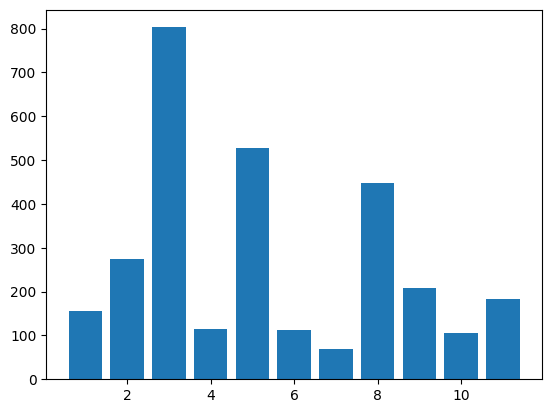


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Podcast_Name:  0.002995
Episode_Title:  0.003681
Episode_Length_minutes:  0.888561
Genre:  0.004228
Host_Popularity_percentage:  0.007818
Publication_Day:  0.003432
Publication_Time:  0.003593
Guest_Popularity_percentage:  0.003765
Number_of_Ads:  0.06

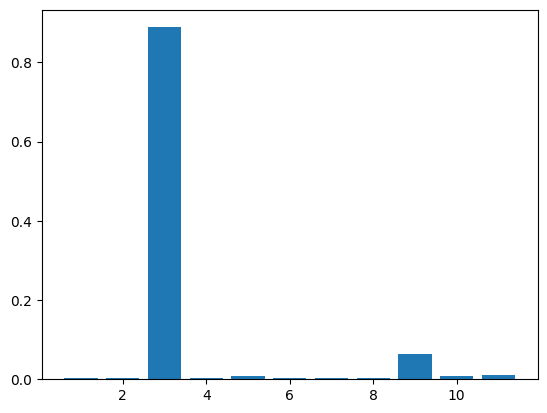

In [77]:
well_performed_clf = [lgbm, xgb1]
for each_clf in well_performed_clf:
  print(each_clf)
  checking_feature_imp(each_clf)
  print()

##Hyperparameter Tuning

###XGB

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 11.9 MB/s eta 0:00:00


In [ ]:
# import optuna
# from math import sqrt

# # Define the objective function for Optuna
# from xgboost import callback
# def objective(trial):
#     # Hyperparameters to optimize
#     param = {
#         'objective': 'reg:squarederror',  # For RMSE
#         'eval_metric': 'rmse',
#         'lambda': trial.suggest_float('lambda', 1e-8, 10.0),
#         'alpha': trial.suggest_float('alpha', 1e-8, 10.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
#         'subsample': trial.suggest_float('subsample', 0.4, 1.0),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 400),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'gamma': trial.suggest_float('gamma', 1e-8, 10.0)
#     }

#     # Create and train the XGBoost model
#     model = XGBRegressor(**param)
#     lst_rmse_stratified = []
#     lst_r2_stratified = []
#     for train_index, test_index in cv.split(X):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
#         model.fit(X_train, Y_train)
#         preds = model.predict(X_test)
#         rmse = sqrt(mean_squared_error(Y_test, preds))
#         r2 = r2_score(Y_test, preds)
#         lst_rmse_stratified.append(rmse)
#         lst_r2_stratified.append(r2)

#     mean_rmse_score = mean(lst_rmse_stratified)
#     mean_r2_score = mean(lst_r2_stratified)

#     return mean_rmse_score, -mean_r2_score

# # Create the Optuna study for multi-objective optimization
# study = optuna.create_study(directions=['minimize', 'minimize'])
# study.optimize(objective, n_trials=50)

# # Print the best trial results
# best_trial = study.best_trials[0]
# print(f'Best trial parameters: {best_trial.params}')
# print(f'Best RMSE: {best_trial.values[0]}')
# print(f'Best R²: {-best_trial.values[1]}')

In [ ]:
def cross_validate_model_x(X_train, y_train, params, model = XGBRegressor,  n_splits=5):
    rmse_scores = []
    r2_scores = []
    # Initialize variables
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    val_scores = []
    test_preds = np.zeros((len(test_data), n_splits), dtype=np.float32)
    # Cross-validation loop
    for fold, (train_ind, valid_ind) in enumerate(cv.split(X_train)):
        # Data splitting
        X_fold_train = X_train.iloc[train_ind]
        y_fold_train = y_train.iloc[train_ind]
        X_val = X_train.iloc[valid_ind]
        y_val = y_train.iloc[valid_ind]

        # Model initialization and training
        clf = model(**params, enable_categorical = True)
        #clf.fit(X_fold_train, y_fold_train)
        clf.fit(X_fold_train, y_fold_train,  eval_set=[(X_val, y_val)], verbose=500)
        # Predict and evaluate
        test_preds[:, fold] = clf.predict(test_data)
        preds = clf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, preds))
        r2 = r2_score(y_val, preds)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

        print("-" * 50)
        print(test_preds)

    test_preds= np.mean(test_preds, axis=1)
    print(f'mean rmse: {mean(rmse_scores)}')
    print(f'mean r2: {mean(r2_scores)}')

    return clf,test_preds

In [ ]:
best_params_xgb = {'lambda': 6.871040928129982, 'alpha': 9.32811452949152, 'colsample_bytree': 0.7895482835984551, 'subsample': 0.6090268867168529, 'learning_rate': 0.05542663086588414, 'n_estimators': 267, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 9.129936151387941}
xgb_optimized, predsx = cross_validate_model_x(X, Y, best_params_xgb)
predsx = pd.DataFrame(predsx)
predsx

[0]	validation_0-rmse:25.99313
[266]	validation_0-rmse:12.79016
--------------------------------------------------
[[54.544285   0.         0.         0.         0.       ]
 [18.74634    0.         0.         0.         0.       ]
 [47.294956   0.         0.         0.         0.       ]
 ...
 [ 6.7055655  0.         0.         0.         0.       ]
 [73.50652    0.         0.         0.         0.       ]
 [57.795547   0.         0.         0.         0.       ]]
[0]	validation_0-rmse:25.96572
[266]	validation_0-rmse:12.81001
--------------------------------------------------
[[54.544285  55.487843   0.         0.         0.       ]
 [18.74634   18.93557    0.         0.         0.       ]
 [47.294956  49.908764   0.         0.         0.       ]
 ...
 [ 6.7055655  6.5314193  0.         0.         0.       ]
 [73.50652   75.26429    0.         0.         0.       ]
 [57.795547  58.276955   0.         0.         0.       ]]
[0]	validation_0-rmse:25.96531
[266]	validation_0-rmse:12.8339

,0
0,54.241283
1,18.366301
2,48.293037
3,75.823944
4,47.949097
...,...
249995,12.029529
249996,58.690052
249997,6.581196
249998,74.973244


#Final Solution

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/Data Science/Kaggle Competitions/Regression/Podcast Listening Time/sample_submission.csv')
sample['Listening_Time_minutes'] = predsx
result = sample
result

,id,Listening_Time_minutes
0,750000,54.241283
1,750001,18.366301
2,750002,48.293037
3,750003,75.823944
4,750004,47.949097
...,...,...
249995,999995,12.029529
249996,999996,58.690052
249997,999997,6.581196
249998,999998,74.973244


In [ ]:
from google.colab import files

result.to_csv('PodcastPred5.csv', index=False)
files.download('PodcastPred5.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>